<a href="https://colab.research.google.com/github/fspanda/FPL-Fantasy-Premier-league-Forecasting/blob/main/Code/Fantasy_League_Ensemble_player%2Btotal_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vaastav/Fantasy-Premier-League.git

Cloning into 'Fantasy-Premier-League'...
remote: Enumerating objects: 5982, done.
remote: Counting objects: 100% (5982/5982), done.
remote: Compressing objects: 100% (3150/3150), done.
remote: Total 119401 (delta 2456), reused 5289 (delta 2329), pack-reused 113419
Receiving objects: 100% (119401/119401), 39.61 MiB | 19.89 MiB/s, done.
Resolving deltas: 100% (55602/55602), done.


In [2]:
import os

file_list = os.listdir('/content/Fantasy-Premier-League/data/2019-20/players')

In [5]:
import pandas as pd
first = True
for name in file_list:  


  file=pd.read_csv("/content/Fantasy-Premier-League/data/2019-20/players/{}/gw.csv".format(name))
  file_length=len(file)
  #tmp_X=file.drop('total_points',axis=1) #point를 굳이 뺄 필요 없겠군
  tmp_X=file

  tmp_Y=file[['total_points']] 
  tmp_Y=tmp_Y.drop(0,axis=0)  
  tmp_X=tmp_X.drop(file_length-1,axis=0)
  tmp_X=tmp_X.drop("kickoff_time",axis=1)
  if first:
    first=False
    train_X=tmp_X
    train_Y=tmp_Y
  train_X=pd.concat([train_X,tmp_X])
  train_Y=pd.concat([train_Y,tmp_Y])




In [ ]:
'''
train_X_t=train_X.values
train_Y_t=train_Y.values
train_X_t = train_X_t.reshape(train_X.shape[0], train_X.shape[1] , 1)
train_X_t=train_X_t.astype(float)
train_Y_t=train_Y.astype(float)
'''

In [6]:
train_X.shape

(21873, 30)

In [7]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=6)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.1) 

In [9]:
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
preds = tree_reg.predict(x_test)

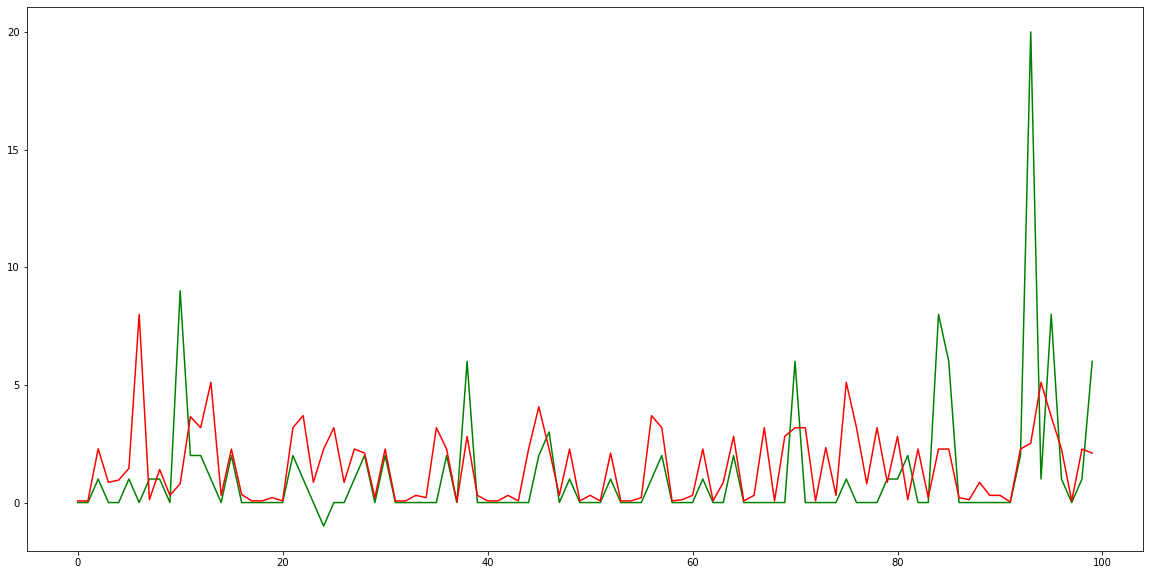

In [11]:

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
st=0
num=100
x=list(range(st,num))
plt.plot(x,y_test[st:num],color="green")
plt.plot(x,preds[st:num],color="red")
plt.show()


In [12]:
tree_reg.score(x_test,y_test)

0.25049672629776554

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

In [14]:
mae

1.235013020307487

In [15]:
mse

4.916821533655455

In [16]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=400, min_samples_split=8)
rnd_clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
preds = rnd_clf.predict(x_test)

In [18]:
rnd_clf.score(x_test,y_test)

0.2621141017325369

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

In [20]:
print("mae : {}".format(mae))
print("mse : {}".format(mse))

mae : 1.255206163389197
mse : 4.84061030989376


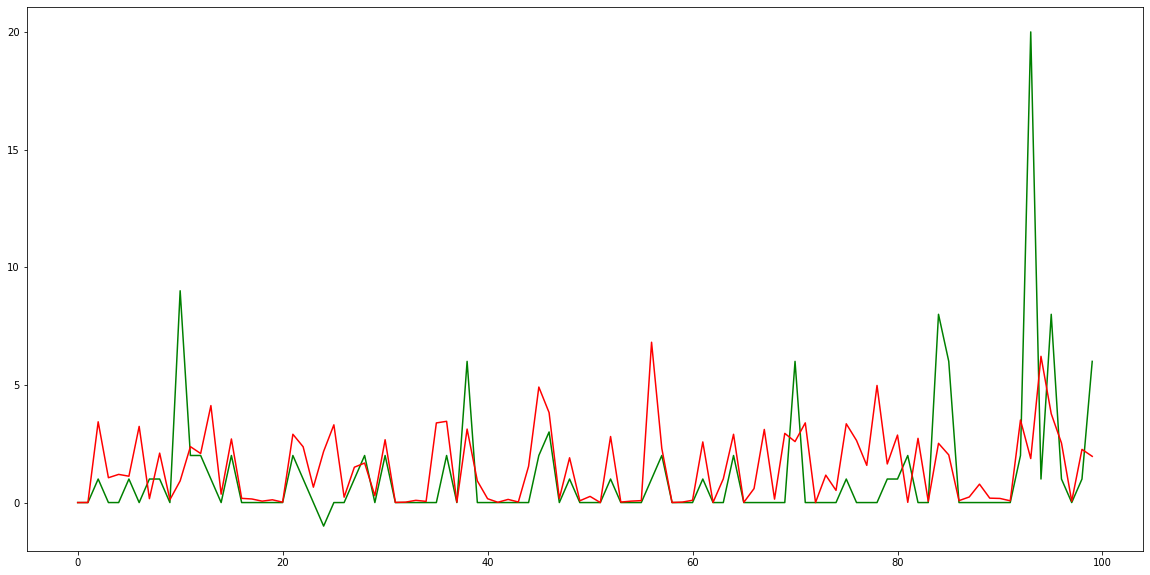

In [21]:

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
st=0
num=100
x=list(range(st,num))
plt.plot(x,y_test[st:num],color="green")
plt.plot(x,preds[st:num],color="red")
plt.show()

In [22]:
imp = rnd_clf.feature_importances_
imp

array([1.98175128e-03, 2.99040899e-03, 2.87089147e-02, 1.17343638e-03,
       3.96420240e-02, 4.74187184e-02, 5.00284872e-02, 8.77316726e-03,
       8.21484941e-04, 3.29063549e-02, 3.51470811e-02, 2.79066456e-01,
       4.06487700e-02, 4.80927349e-04, 1.81151885e-03, 7.21520525e-05,
       6.51124318e-05, 1.70075718e-02, 3.70668903e-03, 7.71241070e-02,
       1.35050642e-02, 1.69963797e-02, 2.61087069e-02, 1.47312317e-02,
       5.20952916e-02, 7.31246814e-02, 5.28191357e-02, 7.40697156e-02,
       4.36664187e-03, 2.60801766e-03])

In [23]:
len(imp)

30

([<matplotlib.axis.YTick at 0x7fcdf4ee51d0>,
 [Text(0, 0, 'assists'),
  Text(0, 0, 'bonus'),
  Text(0, 0, 'bps'),
  Text(0, 0, 'clean_sheets'),
  Text(0, 0, 'creativity'),
  Text(0, 0, 'element'),
  Text(0, 0, 'fixture'),
  Text(0, 0, 'goals_conceded'),
  Text(0, 0, 'goals_scored'),
  Text(0, 0, 'ict_index'),
  Text(0, 0, 'influence'),
  Text(0, 0, 'minutes'),
  Text(0, 0, 'opponent_team'),
  Text(0, 0, 'own_goals'),
  Text(0, 0, 'penalties_missed'),
  Text(0, 0, 'penalties_saved'),
  Text(0, 0, 'red_cards'),
  Text(0, 0, 'round'),
  Text(0, 0, 'saves'),
  Text(0, 0, 'selected'),
  Text(0, 0, 'team_a_score'),
  Text(0, 0, 'team_h_score'),
  Text(0, 0, 'threat'),
  Text(0, 0, 'total_points'),
  Text(0, 0, 'transfers_balance'),
  Text(0, 0, 'transfers_in'),
  Text(0, 0, 'transfers_out'),
  Text(0, 0, 'value'),
  Text(0, 0, 'was_home'),
  Text(0, 0, 'yellow_cards')])

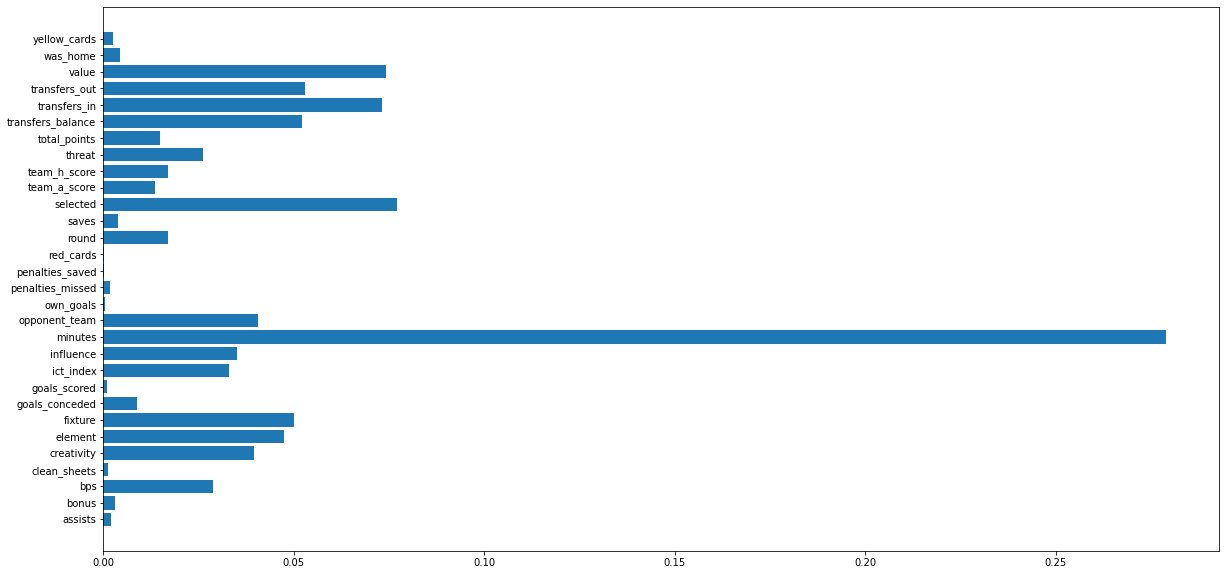

In [24]:
import matplotlib.pyplot as plt
plt.barh(range(len(imp)), imp) # (x, y) # 중요도 (y에 얼마나 영향을 미치는지)
col_names=x_test.columns
plt.yticks(range(len(imp)), col_names) # 축 이름

In [25]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=8, n_estimators=400)
gbrt.fit(x_train,y_train)

errors = [mean_squared_error(y_test,y_pred) for y_pred in gbrt.staged_predict(x_test)]

bst_n_estimators = np.argmin(errors) +1

gbrt_best=GradientBoostingRegressor(max_depth=8, n_estimators=bst_n_estimators)
gbrt_best.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=21,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
preds = gbrt_best.predict(x_test)

In [27]:
gbrt_best.score(x_test,y_test)

0.2687584759496293

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

In [29]:
print("mae : {}".format(mae))
print("mse : {}".format(mse))

mae : 1.2476575506528516
mse : 4.797022505311009


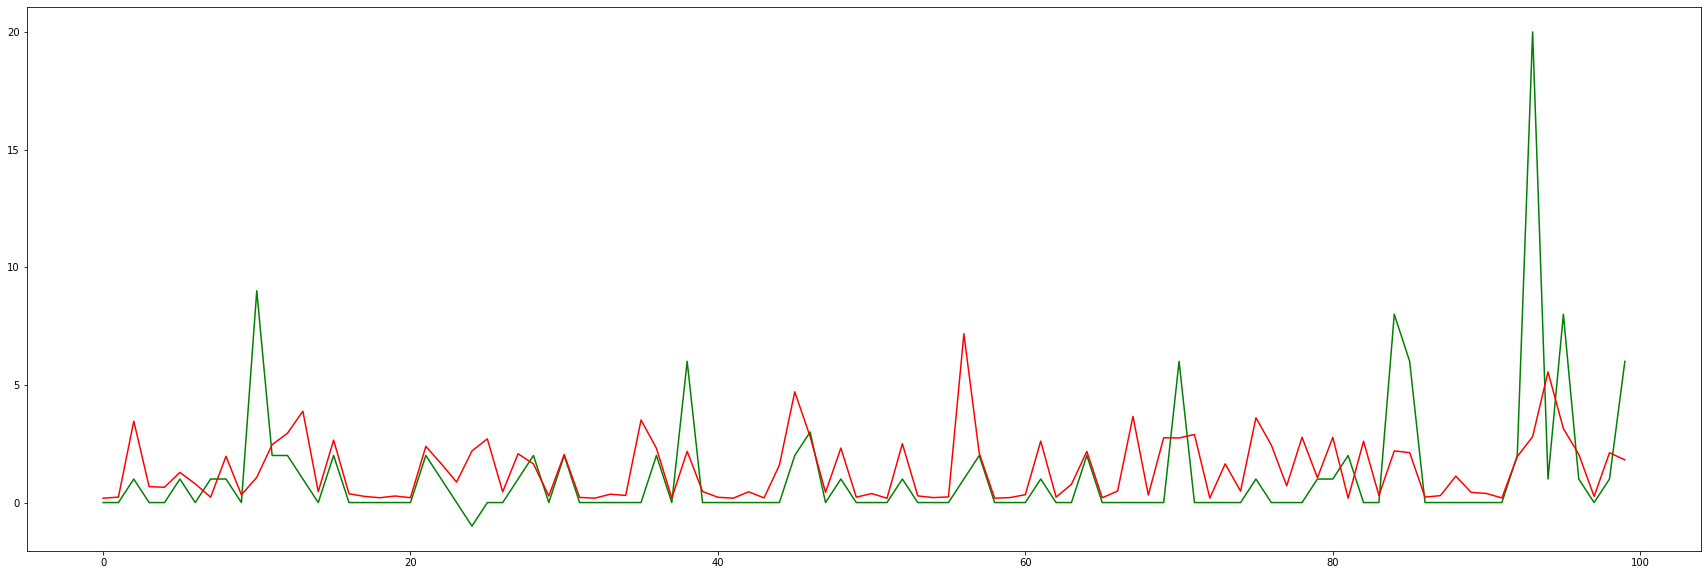

In [30]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
st=0
num=100
x=list(range(st,num))
plt.plot(x,y_test[st:num],color="green")
plt.plot(x,preds[st:num],color="red")
plt.show()

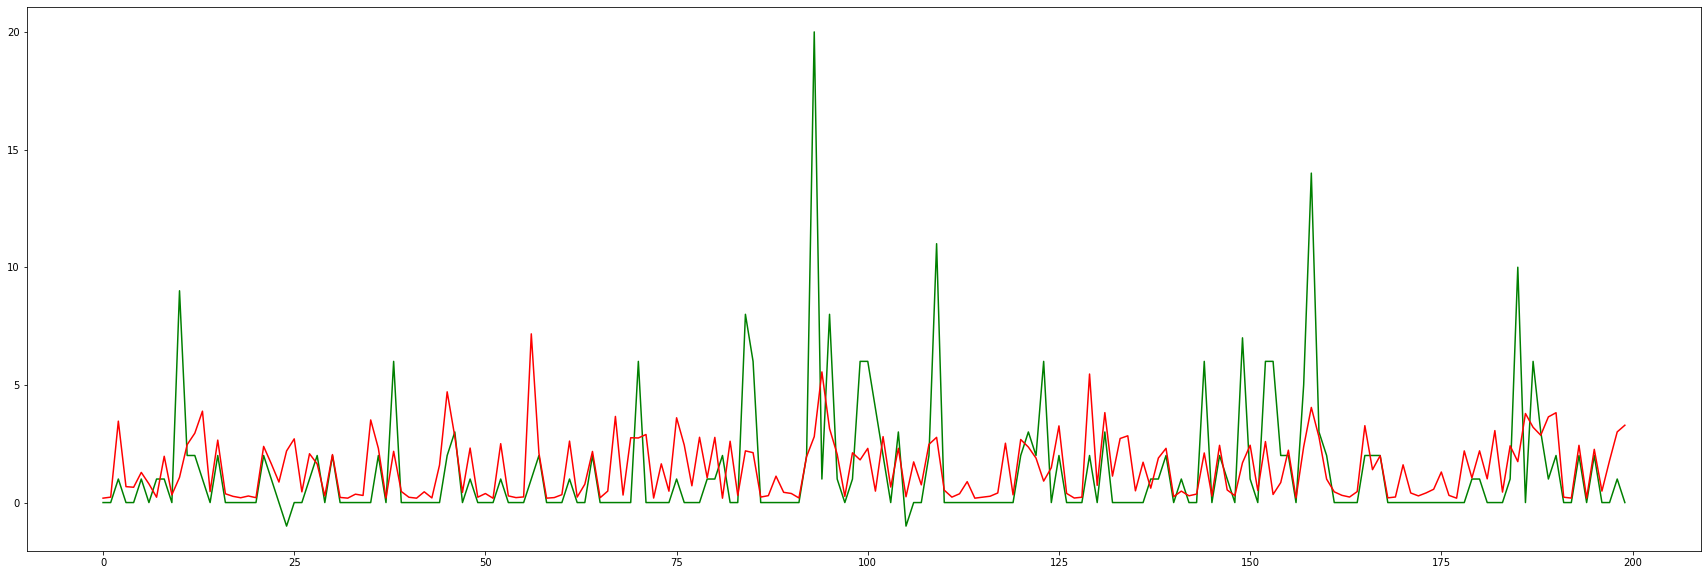

In [31]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
st=0
num=200
x=list(range(st,num))
plt.plot(x,y_test[st:num],color="green")
plt.plot(x,preds[st:num],color="red")
plt.show()

In [32]:
imp = gbrt_best.feature_importances_
imp

array([1.79508752e-03, 1.87995908e-03, 1.98016822e-02, 3.96577561e-04,
       2.30799794e-02, 2.90314301e-02, 4.18835540e-02, 5.84226281e-03,
       3.29324834e-04, 3.78971040e-02, 1.85949715e-02, 4.41962010e-01,
       2.27087807e-02, 4.44932032e-04, 2.25986525e-03, 0.00000000e+00,
       1.78796754e-04, 7.48436508e-03, 3.67271950e-03, 5.92570581e-02,
       8.35728246e-03, 1.31181908e-02, 1.98980211e-02, 1.03386767e-02,
       3.33987739e-02, 5.99833910e-02, 4.24656453e-02, 8.75584437e-02,
       5.53282350e-03, 8.48291258e-04])

([<matplotlib.axis.YTick at 0x7fcdf2f2fef0>,
 [Text(0, 0, 'assists'),
  Text(0, 0, 'bonus'),
  Text(0, 0, 'bps'),
  Text(0, 0, 'clean_sheets'),
  Text(0, 0, 'creativity'),
  Text(0, 0, 'element'),
  Text(0, 0, 'fixture'),
  Text(0, 0, 'goals_conceded'),
  Text(0, 0, 'goals_scored'),
  Text(0, 0, 'ict_index'),
  Text(0, 0, 'influence'),
  Text(0, 0, 'minutes'),
  Text(0, 0, 'opponent_team'),
  Text(0, 0, 'own_goals'),
  Text(0, 0, 'penalties_missed'),
  Text(0, 0, 'penalties_saved'),
  Text(0, 0, 'red_cards'),
  Text(0, 0, 'round'),
  Text(0, 0, 'saves'),
  Text(0, 0, 'selected'),
  Text(0, 0, 'team_a_score'),
  Text(0, 0, 'team_h_score'),
  Text(0, 0, 'threat'),
  Text(0, 0, 'total_points'),
  Text(0, 0, 'transfers_balance'),
  Text(0, 0, 'transfers_in'),
  Text(0, 0, 'transfers_out'),
  Text(0, 0, 'value'),
  Text(0, 0, 'was_home'),
  Text(0, 0, 'yellow_cards')])

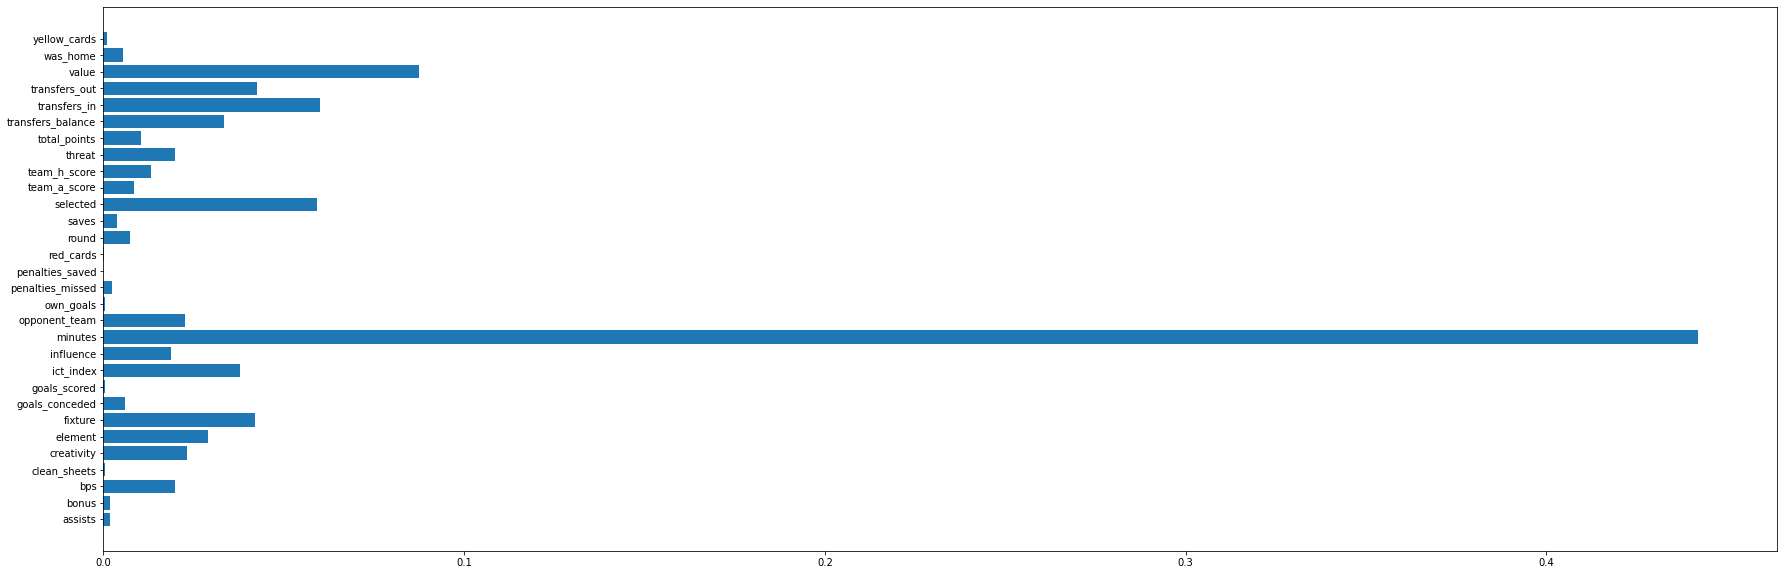

In [33]:
import matplotlib.pyplot as plt
plt.barh(range(len(imp)), imp) # (x, y) # 중요도 (y에 얼마나 영향을 미치는지)
col_names=x_test.columns
plt.yticks(range(len(imp)), col_names) # 축 이름